In [1]:
import sys

sys.path[0] = '/bbkinghome/mbarrera/git_supply/nndp/src'

import sys
import pandas as pd
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import optax
import nndp

In [2]:
from model import u, m, F, policy, T, k_star

In [3]:
key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
params, nn = nndp.initialize_deep_nn(subkey,
                                n_states = 3,
                                n_actions = 1,
                                nodes_per_layer = 256,
                                hidden_layers = 3,
                                hidden_activation = jax.nn.tanh,
                                output_activation = [jax.nn.relu])


def normalize_params(params:dict)->dict:
    for layer in params.keys():
        params[layer]['w'] = params[layer]['w'] / jnp.sqrt(params[layer]['w'].shape[0])
    return params

params = normalize_params(params)

In [4]:
key, subkey = jax.random.split(key)

params,result = nndp.core.train(key = subkey,
               params = params,
               nn = nn,
               policy = policy,
               u = u,
               m = m,
               F = F,
               T = T,
               N_simul = 100,
               batch_size = 10,
               epochs = 200,
               optimizer = optax.adam(1e-4)
               )

[3718345666 3241832197]
[Array([2970213338, 3257369050], dtype=uint32), Array([1331828954,  483151612], dtype=uint32), Array([3692202802, 2993078326], dtype=uint32), Array([2279577222, 1938903633], dtype=uint32), Array([3224447805, 2479487731], dtype=uint32), Array([3324871365, 2779634984], dtype=uint32), Array([3017302986, 2280264390], dtype=uint32), Array([ 714287612, 2361200358], dtype=uint32), Array([3292927106, 3783105617], dtype=uint32), Array([3881717003, 3226736655], dtype=uint32)]
Objective value on training iteration 0 out of 200: 7.88939905166626[1336519323 1294621772]
[Array([1916844648,  443612905], dtype=uint32), Array([1741687697, 2831090157], dtype=uint32), Array([2350119090, 1836977502], dtype=uint32), Array([2318005493,   45016043], dtype=uint32), Array([387583749, 690402828], dtype=uint32), Array([480693563, 350953831], dtype=uint32), Array([ 434086591, 1343143812], dtype=uint32), Array([1531285076, 2284380722], dtype=uint32), Array([2233803969, 3120488731], dtype=ui

KeyboardInterrupt: 

<Axes: title={'center': 'Convergence of Objective Function'}, xlabel='Epoch', ylabel='Objective Function'>

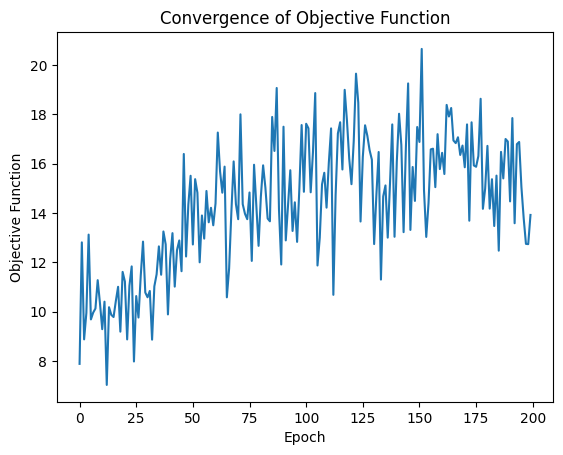

In [ ]:
result.plot_convergence()

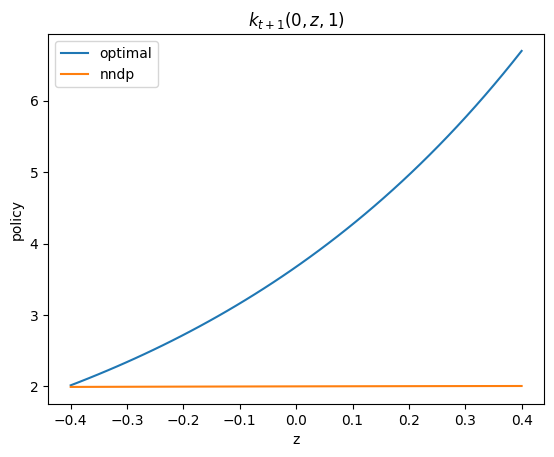

In [ ]:
z = jnp.linspace(-0.4,0.4)
k = 5
t = 0
state = jnp.column_stack([jnp.ones_like(z)*t, z, jnp.ones_like(z)*k])
fig, ax = plt.subplots()
ax.plot(z, k_star(z), label='optimal')
ax.plot(z, policy(state, params, nn), label='nndp')
ax.set(xlabel='z',ylabel='policy', title='$k_{t+1}(0,z,1)$')
ax.legend()
fig.show()

In [ ]:
jnp.exp(0.4)*k**(1/3)-k

NameError: name 'k' is not defined

In [ ]:
a(0.1), a(10)

NameError: name 'a' is not defined

In [ ]:
policy(jnp.array([[0,0.4,1]]), params, nn)

Array([[1.3395097]], dtype=float32)

 message: Solution found.
 success: True
  status: 0
     fun: -0.7013339
       x: 0.3508536
     nit: 21
    nfev: 21

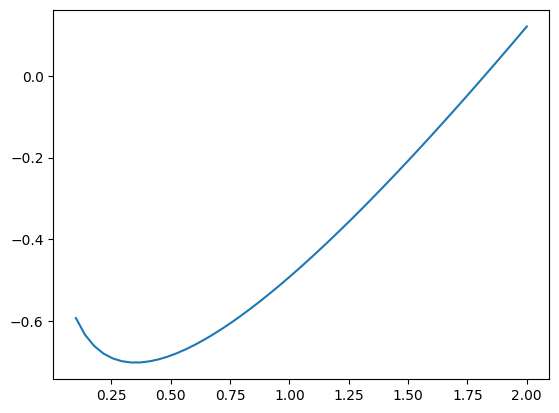

In [ ]:
from scipy.optimize import minimize_scalar
a = lambda k: -(jnp.exp(0.4)*k**(1/3)-k)
k = jnp.linspace(0.1,2)
plt.plot(k, a(k))
minimize_scalar(a, bracket=[0.1,10], bounds = [0.1,3])

In [ ]:
jnp.exp(0.4)

Array(1.4918247, dtype=float32, weak_type=True)

In [ ]:
nndp.core.evaluate_policy(key,
                          policy,
                          params,
                          nn,
                          u,
                          m,
                          s0=jnp.array([[0,0,1.]]),
                          T=T,
                          N_simul=1)

[3382499631 3878610767]
[Array([4104543539, 3483300570], dtype=uint32)]


Array([[1.9]], dtype=float32)

In [ ]:
(1/(1+0.04))**2

0.9245562130177513

In [ ]:
u(jnp.array([[0,1,0]]), jnp.array([2]))

Array([-2.], dtype=float32)

In [ ]:
policy(jnp.array([[0,1,0]]), params, nn)

Array([[0.47282645]], dtype=float32)

In [ ]:
policy(jnp.array([30,3,3]), params, nn)

Array([[2.067164]], dtype=float32)

In [ ]:
u(jnp.array([0,1,1]),jnp.array([1]))

Array(2.6182818, dtype=float32)

In [ ]:
key = jax.random.PRNGKey(0)
m(key, jnp.array([[0,1,1]]),jnp.array([[1.5]]))

Array([[1. , 1. , 1.5]], dtype=float32)

In [ ]:
F(key= jax.random.PRNGKey(0) , N=1)

Array([[ 0.        ,  0.26210177, 12.049849  ]], dtype=float32)

In [ ]:
key = jax.random.PRNGKey(0)
params, nn = nndp.initialize_deep_nn(key,
                                n_states = 3,
                                n_actions = 1,
                                nodes_per_layer = 256,
                                hidden_layers = 3,
                                hidden_activation = jax.nn.tanh,
                                output_activation = [jax.nn.relu])

In [ ]:
policy(jnp.array([[0,2,1]]), params, nn)

Array([[0.13153245]], dtype=float32)

In [5]:
from nndp import evaluate_policy

key = jax.random.PRNGKey(0)

evaluate_policy(key=key,
                policy=policy,
                params=params,
                nn=nn,
                u=u,
                m=m,
                s0=jnp.array([[0,1.,1.]]),
                T=T,
                N_simul=1)


[4146024105  967050713]
[Array([2718843009, 1272950319], dtype=uint32)]


Array([[3.6182818]], dtype=float32)

In [ ]:
params

{'linear': {'w': Array([[ 4.61147092e-02, -9.34243947e-02, -6.79763556e-02,
           3.00944388e-01, -7.36520410e-01, -2.34205842e-01,
          -1.63559943e-01,  7.27895945e-02, -6.62947670e-02,
          -1.32491663e-01,  2.26811424e-01,  5.39979696e-01,
          -4.49149497e-02, -3.41979384e-01, -1.66633159e-01,
          -5.99614859e-01, -7.33612701e-02,  5.73329568e-01,
          -1.65594310e-01, -5.45871615e-01, -3.31876464e-02,
           6.86597347e-01, -9.93490696e-01,  4.82242107e-01,
           2.16071814e-01, -2.12265506e-01, -2.32248321e-01,
          -1.21517673e-01,  2.89913714e-01,  8.08311880e-01,
          -5.03322899e-01,  6.22503042e-01, -3.96303862e-01,
          -9.12250340e-01, -9.91572142e-02, -9.38085854e-01,
           1.30373657e-01,  5.13039351e-01,  2.21026614e-02,
          -1.15089439e-01,  6.91006422e-01,  4.76047456e-01,
           1.11466408e+00, -1.01811051e+00,  7.16521963e-02,
           1.80341557e-01,  4.67382133e-01, -5.96623123e-01,
         